# Construcción de un modelo de regresión lineal para un conjunto de puntos aleatorios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

Vamos a construir un conjunto de puntos aleatorios que esten cercanos a la recta:
$$y = 2 x + 3$$

In [2]:
rng = np.random.RandomState(100)
x = 10 * rng.rand(100)
y = 2 * x + 3 + rng.randn(100)

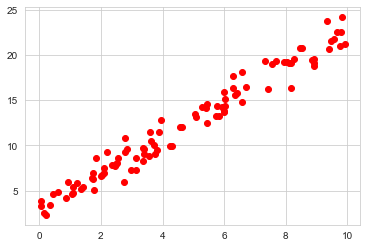

In [3]:
plt.scatter(x,y, c = 'red')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y)

LinearRegression()

In [5]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

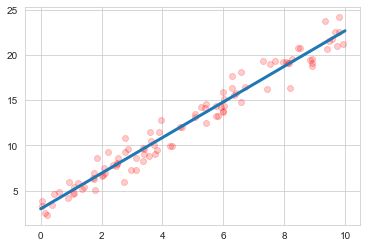

In [6]:
plt.scatter(x, y, c = 'red', alpha = 0.2)
plt.plot(xfit, yfit, lw = 3)

plt.show()

In [7]:
print("Pendiente del módelo (m): ", model.coef_[0])
print("Intersección del módelo (b):", model.intercept_)

Pendiente del módelo (m):  1.972465211334937
Intersección del módelo (b): 2.9848597527957796


# Obtención y preparación de datos

In [8]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

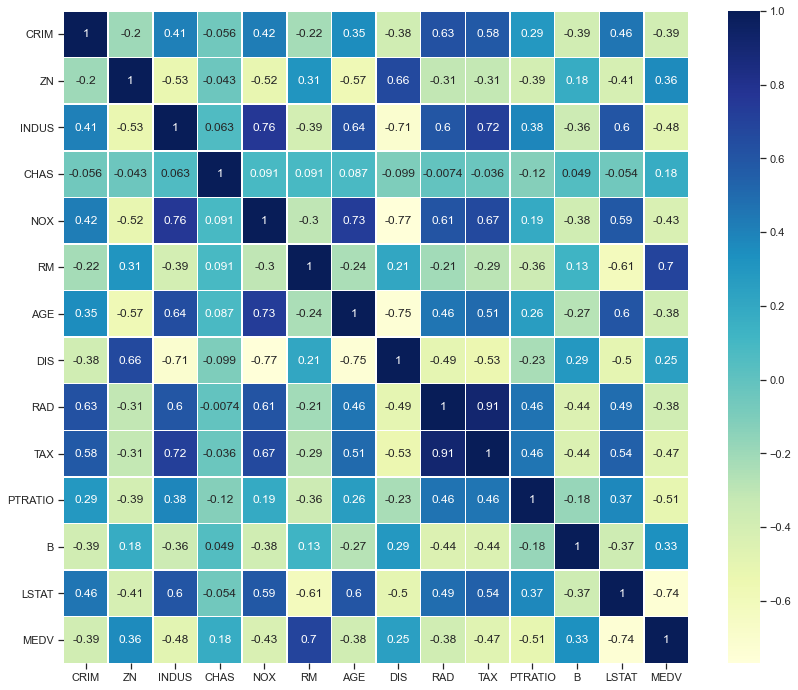

In [9]:
correlation = df.corr()
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(correlation,annot=True, linewidths=.5, cmap="YlGnBu")

In [10]:
cor_target = abs(correlation["MEDV"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [11]:
df.corr()["MEDV"].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [12]:
x = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

In [13]:
x

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [14]:
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

# Train Test Split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=100)

<center><img src="img/TrainTestSplit.png" width = "80%"></center>

In [16]:
print("Tamaño del conjunto de datos: ", x.size)
print("Tamaño del conjunto de entrenamiento: ", x_train.size)
print("Tamaño del conjunto de prueba: ", x_test.size)

Tamaño del conjunto de datos:  506
Tamaño del conjunto de entrenamiento:  404
Tamaño del conjunto de prueba:  102


In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train,y_train)

y_train_predict = reg.predict(x_train)
y_test_predict = reg.predict(x_test)

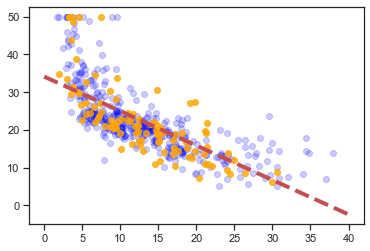

In [18]:
plt.scatter(x_train, y_train, c = "blue", alpha = 0.2)
plt.scatter(x_test, y_test, c = "orange", alpha = 0.8)

x_plot = np.linspace(0,40).reshape(-1, 1)
y_plot = reg.predict(x_plot)

plt.plot(x_plot, y_plot,"r--", lw = 4)
plt.show()

In [19]:
from sklearn.metrics import r2_score
print("Entrenamiento", r2_score(y_train, y_train_predict))
print("Prueba", r2_score(y_test, y_test_predict))

Entrenamiento 0.542497603066411
Prueba 0.5453164888101072


## Ahora hagamos una función usando lo anterior.

In [20]:
def graficaRegresion(size):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = size, random_state=100)

    print("Tamaño del conjunto de datos: ", x.size)
    print("Tamaño del conjunto de entrenamiento: ", x_train.size)
    print("Tamaño del conjunto de prueba: ", x_test.size)

    reg = LinearRegression().fit(x_train,y_train)

    y_train_predict = reg.predict(x_train)
    y_test_predict = reg.predict(x_test)

    plt.scatter(x_train, y_train, c = 'blue', alpha = 0.2)
    plt.scatter(x_test, y_test, c = 'orange', alpha = 0.8)

    x_plot = np.linspace(0,40).reshape(-1, 1)
    y_plot = reg.predict(x_plot)

    plt.plot(x_plot, y_plot,"r--", lw = 4)
    plt.show()

    print("Entrenamiento", r2_score(y_train, y_train_predict))
    print("Prueba", r2_score(y_test, y_test_predict))

Tamaño del conjunto de datos:  506
Tamaño del conjunto de entrenamiento:  354
Tamaño del conjunto de prueba:  152


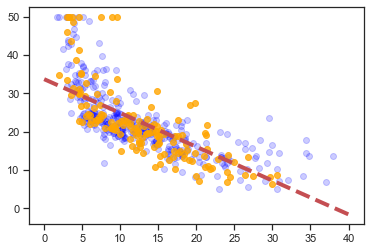

Entrenamiento 0.5463422586197755
Prueba 0.5322297704403378


In [21]:
graficaRegresion(0.30)

Tamaño del conjunto de datos:  506
Tamaño del conjunto de entrenamiento:  303
Tamaño del conjunto de prueba:  203


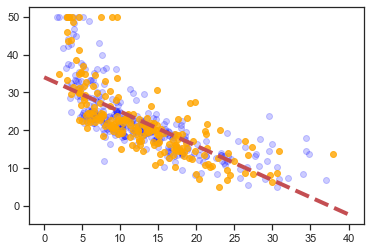

Entrenamiento 0.5563902183259423
Prueba 0.5254947352874879


In [22]:
graficaRegresion(0.40)

Tamaño del conjunto de datos:  506
Tamaño del conjunto de entrenamiento:  253
Tamaño del conjunto de prueba:  253


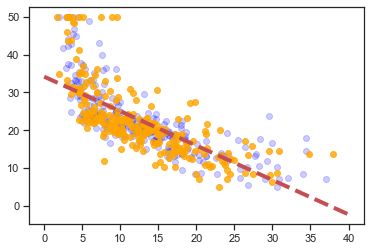

Entrenamiento 0.5784871280348703
Prueba 0.5121385430074716


In [23]:
graficaRegresion(0.50)

# Regresión Múltiple

In [24]:
x = df[["RM","AGE"]]
y = df["MEDV"].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=100)

reg = LinearRegression().fit(x_train,y_train)

y_train_predict = reg.predict(x_train)
y_test_predict = reg.predict(x_test)

print("Entrenamiento", r2_score(y_train, y_train_predict))
print("Prueba", r2_score(y_test, y_test_predict))

Entrenamiento 0.5288127480635428
Prueba 0.5314945931035924


In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


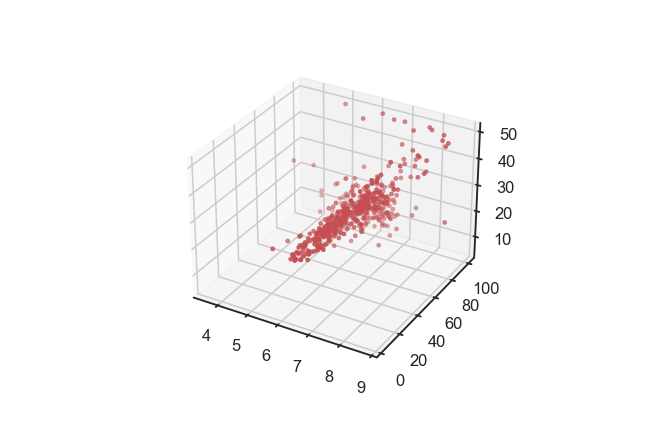

In [26]:
from mpl_toolkits.mplot3d import Axes3D

x_ = df["RM"]
y_ = df["AGE"]
z_ = df["MEDV"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_, y_, z_, c='r', marker='.')
plt.show()

In [27]:
def regresionMultiple():
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.20, random_state=100)

    reg = LinearRegression().fit(x_train,y_train)

    y_train_predict = reg.predict(x_train)
    y_test_predict = reg.predict(x_test)

    print("Entrenamiento", r2_score(y_train, y_train_predict))
    print("Prueba", r2_score(y_test, y_test_predict))

In [28]:
x = df[["RM","LSTAT"]]
y = df["MEDV"].values.reshape(-1, 1)

regresionMultiple()

Entrenamiento 0.6293490700091449
Prueba 0.6631251961250052


In [29]:
x = df[["RM","LSTAT", "AGE"]]
y = df["MEDV"].values.reshape(-1, 1)

regresionMultiple()

Entrenamiento 0.6293948954508914
Prueba 0.6640049746245067


In [30]:
x = df[["RM","LSTAT", "AGE", "PTRATIO"]]
y = df["MEDV"].values.reshape(-1, 1)

regresionMultiple()

Entrenamiento 0.671896525294406
Prueba 0.702631709321388
